<a href="https://colab.research.google.com/github/TimonKazman/DataAnalyticsProjects/blob/main/Bert_NLP_tweet_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#install lightweight bert framework
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#install packages
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import ktrain
from ktrain import tabular
from ktrain import text
from sklearn.model_selection import train_test_split

In [65]:
#load data
df_test = pd.read_csv("Sentiment140_test.csv", names=["polarity", "id", "date", "query_device","user", "tweet"])

In [66]:
df_train = pd.read_csv("Sentiment140_train.csv", 
                       names=["polarity", "id", "date", "query_device","user", "tweet"], 
                       encoding="ISO-8859-1", 
                       warn_bad_lines=True, 
                       error_bad_lines=False, 
                       quotechar='"', 
                       delimiter=',',
                       engine = "python")

In [67]:
df_train

,polarity,id,date,query_device,user,tweet
0,"ock Band """,NaN,None,None,None,None
1,0,1.678144e+09,Sat May 02 05:40:38 PDT 2009,NO_QUERY,RichardBlais,"Another day of cooking shows. KBIS , Atlanta. ..."
2,0,1.678145e+09,Sat May 02 05:40:41 PDT 2009,NO_QUERY,dumbbadoor,@Addiiee FFUUU I'm an Elf now! I really don't ...
3,0,1.678145e+09,Sat May 02 05:40:46 PDT 2009,NO_QUERY,teejay0109,@Jayme1988 yeah im ok...I did the blog to get ...
4,0,1.678145e+09,Sat May 02 05:40:47 PDT 2009,NO_QUERY,jchcrawk,"Too much work to do as far as moving, had to s..."
...,...,...,...,...,...,...
1550573,4,2.193602e+09,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1550574,4,2.193602e+09,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1550575,4,2.193602e+09,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1550576,4,2.193602e+09,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [68]:
df_test

,polarity,id,date,query_device,user,tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [36]:
#little EDA & Data preprocessing/feature engineering
print("TEST:")
print(df_test.polarity.value_counts())
print("TRAIN")
print(df_train.polarity.value_counts())

TEST:
4    182
0    177
2    139
Name: polarity, dtype: int64
TRAIN
4             800000
0             750577
ock Band "         1
Name: polarity, dtype: int64


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550578 entries, 0 to 1550577
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   polarity      1550578 non-null  object 
 1   id            1550577 non-null  float64
 2   date          1550577 non-null  object 
 3   query_device  1550577 non-null  object 
 4   user          1550577 non-null  object 
 5   tweet         1550577 non-null  object 
dtypes: float64(1), object(5)
memory usage: 71.0+ MB


In [69]:
df_train.drop(["id", "date", "query_device", "user"],axis=1, inplace=True)
df_test.drop(["id", "date", "query_device", "user"],axis=1, inplace=True)

In [70]:
df_train.isnull().sum()

polarity    0
tweet       1
dtype: int64

In [71]:
df_train.dropna(inplace=True)

In [72]:
df_train.isnull().sum()

polarity    0
tweet       0
dtype: int64

In [42]:
print(len(df_train.tweet.max()))
print(len(df_train.tweet.min()))
print(len(df_test.tweet.max()))
print(len(df_test.tweet.min()))

163
52
26
133


In [43]:
df_test

,polarity,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
493,2,Ask Programming: LaTeX or InDesign?: submitted...
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,4,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [73]:
df_test = df_test[df_test["polarity"]!=2]

In [76]:
#give class names
df_test["polarity"] = df_test.polarity.apply(lambda x: "good" if x==4 else "bad")
df_train["polarity"] = df_train.polarity.apply(lambda x: "good" if x==4 else "bad")

<ipython-input-76-dc4038e1ff58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["polarity"] = df_test.polarity.apply(lambda x: "good" if x==4 else "bad")


In [55]:
print(df_test.tweet.head())

0    @stellargirl I loooooooovvvvvveee my Kindle2. ...
1    Reading my kindle2...  Love it... Lee childs i...
2    Ok, first assesment of the #kindle2 ...it fuck...
3    @kenburbary You'll love your Kindle2. I've had...
4    @mikefish  Fair enough. But i have the Kindle2...
Name: tweet, dtype: object


In [47]:
#get a smaller dataset to make the training faster until good hyperparameters are found
df_first_half, df_second_half = train_test_split(df_train, test_size=0.9, stratify=df_train['polarity'])

In [48]:
df_second_half.head()

,polarity,tweet
958619,bad,/me nips over 2 the 7-Eleven for beer before t...
769581,bad,Chillen at waimea beach.
1143216,bad,"Life right now, is soo good"
140930,bad,cant get back to sleep
1284702,bad,"@DCBadger why, yes i do. an excellent call"


In [49]:
df_test

,polarity,tweet
0,good,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,good,Reading my kindle2... Love it... Lee childs i...
2,good,"Ok, first assesment of the #kindle2 ...it fuck..."
3,good,@kenburbary You'll love your Kindle2. I've had...
4,good,@mikefish Fair enough. But i have the Kindle2...
...,...,...
492,good,"After using LaTeX a lot, any other typeset mat..."
494,bad,"On that note, I hate Word. I hate Pages. I hat..."
495,good,Ahhh... back in a *real* text editing environm...
496,bad,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [93]:
import re 

pattern = "'@[\w]+"
pattern_1 = "[ ]{2,}"
pattern_2 ="\\n[ ]{2,}"


df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern, "", x))
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_2, "", x))
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_1, " ", x))

df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_2, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_1, " ", x))

pattern_3 = "@[\w]+"
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_3, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_3, "", x))

<ipython-input-93-33ddadc62a7b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern, "", x))
<ipython-input-93-33ddadc62a7b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_2, "", x))
<ipython-input-93-33ddadc62a7b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [94]:
#split train data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_test["tweet"], 
                                                    df_test["polarity"], 
                                                    test_size=0.10, 
                                                    random_state=42,
                                                    shuffle = True,
                                                    stratify = df_test["polarity"])

In [96]:
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=200, class_names=["good", "bad"])
trn = t.preprocess_train(X_train.values, y_train.values)
val = t.preprocess_test(X_test.values, y_test.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)
learner.fit_onecycle(1e-3, 5)
learner.validate(class_names=t.get_classes())

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 26
	99percentile : 28


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:745: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 23
	99percentile : 24




begin training using onecycle policy with max lr of 0.001...
Epoch 1/5
54/54 [==============================] - 17s 170ms/step - loss: 0.6524 - accuracy: 0.6285 - val_loss: 0.4296 - val_accuracy: 0.7778
Epoch 2/5
54/54 [==============================] - 8s 144ms/step - loss: 0.6708 - accuracy: 0.6347 - val_loss: 0.7144 - val_accuracy: 0.5000
Epoch 3/5
54/54 [==============================] - 8s 146ms/step - loss: 0.7065 - accuracy: 0.4892 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/5
54/54 [==============================] - 8s 146ms/step - loss: 0.7022 - accuracy: 0.4985 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 1s 53ms/step
              precision    recall  f1-score   support

         bad       0.50      1.00      0.67        18
        good       0.00      0.00      0.00        18

    accuracy                           0.50        36
   macro avg       0.25      0.50      0.33        36
weighted avg       0.25      0.50     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[18,  0],
       [18,  0]])

In [97]:
#get necessary data and preprocess with bert framework
(x_train_bert, y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=X_train.values,
                                                                                        y_train=y_train.values,
                                                                                        x_test=X_test.values,
                                                                                        y_test=y_test.values,
                                                                                        class_names=["good", "bad"],
                                                                                        preprocess_mode = "bert",
                                                                                        lang = "en",
                                                                                        max_features=35000,
                                                                                        maxlen=200)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:745: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [98]:
#build the model & learner
model = text.text_classifier("bert", 
                             train_data=(x_train_bert, y_train_bert), 
                             preproc=preproc)

learner = ktrain.get_learner(model, 
                             train_data=(x_train_bert,y_train_bert), 
                             val_data=(x_val_bert, y_val_bert), 
                             batch_size=16)

Is Multi-Label? False
maxlen is 200
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
21/21 [==============================] - 34s 671ms/step - loss: 1.0422 - accuracy: 0.5077
Epoch 2/5
21/21 [==============================] - 14s 686ms/step - loss: 0.7101 - accuracy: 0.5728
Epoch 3/5
21/21 [==============================] - 14s 681ms/step - loss: 0.7776 - accuracy: 0.6223
Epoch 4/5
21/21 [==============================] - 14s 669ms/step - loss: 9.2675 - accuracy: 0.5263
Epoch 5/5
21/21 [==============================] - 1s 35ms/step - loss: 26.7388 - accuracy: 0.4375


done.
Visually inspect loss plot and select learning rate associated with falling loss


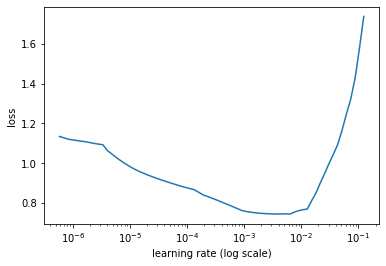

In [99]:
#find the right values e.g. learning rate
learner.lr_find(show_plot=True, max_epochs=5) # estimate learning rate


In [100]:
learner.autofit(1e-3,5)



begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/5
21/21 [==============================] - 38s 884ms/step - loss: 0.8060 - accuracy: 0.5232 - val_loss: 0.6926 - val_accuracy: 0.5278
Epoch 2/5
21/21 [==============================] - 15s 703ms/step - loss: 0.7207 - accuracy: 0.4830 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 3/5
21/21 [==============================] - 15s 712ms/step - loss: 0.7082 - accuracy: 0.5418 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/5
21/21 [==============================] - 15s 703ms/step - loss: 0.6928 - accuracy: 0.4861 - val_loss: 0.7446 - val_accuracy: 0.5000
Epoch 5/5
21/21 [==============================] - 15s 692ms/step - loss: 0.7217 - accuracy: 0.5759 - val_loss: 0.6983 - val_accuracy: 0.5000


In [101]:
learner.fit_onecycle(1e-3, 5)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/5
21/21 [==============================] - 15s 692ms/step - loss: 0.7041 - accuracy: 0.5077 - val_loss: 0.7938 - val_accuracy: 0.5000
Epoch 2/5
21/21 [==============================] - 15s 692ms/step - loss: 0.7222 - accuracy: 0.4768 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 3/5
21/21 [==============================] - 15s 697ms/step - loss: 0.7866 - accuracy: 0.4861 - val_loss: 1.2939 - val_accuracy: 0.5000
Epoch 4/5
21/21 [==============================] - 15s 699ms/step - loss: 0.7804 - accuracy: 0.4954 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
21/21 [==============================] - 15s 698ms/step - loss: 0.7725 - accuracy: 0.4923 - val_loss: 0.7078 - val_accuracy: 0.5000


In [102]:
#validate the data again
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=["good", "bad"])

2/2 [==============================] - 5s 86ms/step
              precision    recall  f1-score   support

        good       0.50      1.00      0.67        18
         bad       0.00      0.00      0.00        18

    accuracy                           0.50        36
   macro avg       0.25      0.50      0.33        36
weighted avg       0.25      0.50      0.33        36



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[18,  0],
       [18,  0]])

In [103]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [104]:
temp_data = ["I loved that I hated the ending of this message!",
             "The tweet was simply awful...",
             "I really enjoyed it!"]

In [105]:
predictor.predict(temp_data)

1/1 [==============================] - 0s 87ms/step


['bad', 'bad', 'bad']